#              **ELECTRICITY PRODUCTION ANALYSIS**

# Context

This dataset contains annual electricity production (in terawatt-hours, TWh) by energy source (e.g., coal, gas, solar, wind, hydro, etc.) across countries and years.

# Objective

To analyze global and country-specific trends in electricity production by energy source, identify outliers or anomalies, and create meaningful
metrics to help monitor transitions toward renewable energy sources.

# Data Description

The dataset used in this analysis represents the total electricity production by source, measured in TWh (terawatt-hours), across various countries and years. It includes both renewable and non-renewable energy sources, allowing comparative and trend analysis over time and regions.

# Data Dictionary

| Column Name        | Description                                                                  |
| ------------------ | ---------------------------------------------------------------------------- |
| `Entity`           | The country or region for which electricity production data is recorded      |
| `Code`             | ISO or shorthand country code (can be missing for aggregated regions)        |
| `Year`             | The calendar year of the data                      |
| `Coal`             | Electricity produced from coal sources (in TWh)                              |
| `Gas`              | Electricity produced from natural gas (in TWh)                               |
| `Oil`              | Electricity produced from oil-based sources (in TWh)                         |
| `Nuclear`          | Electricity produced from nuclear power (in TWh)                             |
| `Hydro`            | Electricity produced from hydroelectric power (in TWh)                       |
| `Solar`            | Electricity produced from solar energy (in TWh)                              |
| `Wind`             | Electricity produced from wind energy (in TWh)                               |
| `Bioenergy`        | Electricity produced from biomass, biogas, or other biological sources (TWh) |
| `Other_renewables` | Electricity from other renewable sources not specifically listed (TWh)       |


# Problem Solving

## Let's start by importing the required libraries


In [6]:
%pip install seaborn
%pip install matplotlib
%pip install pandas

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


In [8]:
import os
os.getcwd()


'/drive/data/Project 1'

In [8]:
# Load the uploaded CSV file
file_path = "/drive/data/Project 1/Electricity production by source.csv"
df = pd.read_csv(file_path)

In [10]:
# Show basic info and the first 10 rows
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8263 entries, 0 to 8262
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            8263 non-null   object 
 1   Code              8263 non-null   object 
 2   Year              8263 non-null   int64  
 3   Coal              5692 non-null   float64
 4   Gas               5626 non-null   float64
 5   Nuclear           8156 non-null   float64
 6   Hydro             7462 non-null   float64
 7   Solar             6668 non-null   float64
 8   Oil               5736 non-null   float64
 9   Wind              6697 non-null   float64
 10  Bioenergy         5317 non-null   float64
 11  Other renewables  4753 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 710.2+ KB


,Entity,Code,Year,Coal,Gas,Nuclear,Hydro,Solar,Oil,Wind,Bioenergy,Other renewables
0,Afghanistan,AFG,2000,0.00,0.0,0.0,0.31,0.0,0.17,0.0,0.0,0.0
1,Afghanistan,AFG,2001,0.04,0.0,0.0,0.50,0.0,0.15,0.0,0.0,0.0
2,Afghanistan,AFG,2002,0.04,0.0,0.0,0.56,0.0,0.11,0.0,0.0,0.0
3,Afghanistan,AFG,2003,0.09,0.0,0.0,0.63,0.0,0.19,0.0,0.0,0.0
4,Afghanistan,AFG,2004,0.06,0.0,0.0,0.56,0.0,0.17,0.0,0.0,0.0
5,Afghanistan,AFG,2005,0.06,0.0,0.0,0.59,0.0,0.17,0.0,0.0,0.0
6,Afghanistan,AFG,2006,0.15,0.0,0.0,0.64,0.0,0.11,0.0,0.0,0.0
7,Afghanistan,AFG,2007,0.15,0.0,0.0,0.75,0.0,0.11,0.0,0.0,0.0
8,Afghanistan,AFG,2008,0.13,0.0,0.0,0.54,0.0,0.11,0.0,0.0,0.0
9,Afghanistan,AFG,2009,0.06,0.0,0.0,0.78,0.0,0.05,0.0,0.0,0.0


The dataset is loaded, and the first ten rows are displayed. This step provides an initial overview of the data structure, including column names and sample values, which is crucial for understanding the type of data we are dealing with. Observing the initial rows helps in identifying the types of variables present and planning the subsequent data cleaning and analysis steps.

In [11]:
# Checking for missing values in the dataset 
df.isnull().sum()

Entity                 0
Code                   0
Year                   0
Coal                2571
Gas                 2637
Nuclear              107
Hydro                801
Solar               1595
Oil                 2527
Wind                1566
Bioenergy           2946
Other renewables    3510
dtype: int64

The dataset contains a large number of missing values for almost all the columns except the 
; Entity, Code and Year columns. We will treat this either by imputation techniques or other techniques likeninputing the Median value of the column for each missing value in the column. This will depend on the extent and nature of the missing data. Handling missing values is crucial as they can significantly affect the statistical analysis and the validity of the results.

In [12]:
# Displaying summary statistics of the numerical columns 
df.describe()

,Year,Coal,Gas,Nuclear,Hydro,Solar,Oil,Wind,Bioenergy,Other renewables
count,8263.000000,5692.000000,5626.000000,8156.000000,7462.000000,6668.000000,5736.000000,6697.000000,5317.000000,4753.000000
mean,2000.502965,95.788839,50.917572,25.246391,38.828433,2.326702,15.183445,5.190941,3.475960,0.659954
std,15.911960,668.019549,353.908374,181.624466,246.747493,35.940195,98.186891,64.300019,29.208175,5.042745
min,1965.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.090000,0.000000,0.000000,0.000000
50%,2004.000000,0.000000,0.500000,0.000000,1.630000,0.000000,0.760000,0.000000,0.000000,0.000000
75%,2013.000000,7.622500,14.487500,0.000000,10.430000,0.010000,4.790000,0.020000,0.290000,0.000000
max,2023.000000,10467.930000,6622.930000,2762.240000,4344.050000,1629.900000,1366.022600,2304.440000,678.740000,89.810000


In [13]:
# Data validation: Check the unique values to identify any unexpected or erroneous data.
unique_values = df.nunique()
print("Unique values by column:\n", unique_values)

Unique values by column:
 Entity               219
Code                 219
Year                  59
Coal                1923
Gas                 2269
Nuclear             1498
Hydro               3472
Solar                553
Oil                 1744
Wind                 811
Bioenergy            721
Other renewables     296
dtype: int64


In [14]:
# Check for outliers: Using summary statistics such as mean, median, 
# standard deviation, and quartiles, we can identify outliers in numeric columns.
summary_stats = df.describe().round(2)
print("Summary statistics:\n", summary_stats)

# Proportion of missing values relative to the total entries in the revenue column
print("Proportion of missing values in 'Coal' column:\n", (df['Coal'].isna().sum() / df['Coal'].count()) * 100)
print("Proportion of missing values in 'Gas' column:\n", (df['Gas'].isna().sum() / df['Gas'].count()) * 100)
print("Proportion of missing values in 'Nuclear' column:\n", (df['Nuclear'].isna().sum() / df['Nuclear'].count()) * 100)
print("Proportion of missing values in 'Hydro' column:\n", (df['Hydro'].isna().sum() / df['Hydro'].count()) * 100)
print("Proportion of missing values in 'Solar' column:\n", (df['Solar'].isna().sum() / df['Solar'].count()) * 100)
print("Proportion of missing values in 'Oil' column:\n", (df['Oil'].isna().sum() / df['Oil'].count()) * 100)
print("Proportion of missing values in 'Wind' column:\n", (df['Wind'].isna().sum() / df['Wind'].count()) * 100)
print("Proportion of missing values in 'Bioenergy' column:\n", (df['Bioenergy'].isna().sum() / df['Bioenergy'].count()) * 100)
print("Proportion of missing values in 'Other renewables' column:\n", (df['Other renewables'].isna().sum() / df['Other renewables'].count()) * 100)

Summary statistics:
           Year      Coal      Gas  Nuclear    Hydro    Solar      Oil  \
count  8263.00   5692.00  5626.00  8156.00  7462.00  6668.00  5736.00   
mean   2000.50     95.79    50.92    25.25    38.83     2.33    15.18   
std      15.91    668.02   353.91   181.62   246.75    35.94    98.19   
min    1965.00      0.00     0.00     0.00     0.00     0.00     0.00   
25%    1989.00      0.00     0.00     0.00     0.02     0.00     0.09   
50%    2004.00      0.00     0.50     0.00     1.63     0.00     0.76   
75%    2013.00      7.62    14.49     0.00    10.43     0.01     4.79   
max    2023.00  10467.93  6622.93  2762.24  4344.05  1629.90  1366.02   

          Wind  Bioenergy  Other renewables  
count  6697.00    5317.00           4753.00  
mean      5.19       3.48              0.66  
std      64.30      29.21              5.04  
min       0.00       0.00              0.00  
25%       0.00       0.00              0.00  
50%       0.00       0.00              0.00  

In [15]:
df_copy=df.copy()

In [16]:
# Select only numerical columns related to electricity production
numeric_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns.drop("Year")

# Prepare a dictionary to store outliers
outlier_summary = {}

# Apply IQR method to each numeric column to detect outliers
for col in numeric_cols:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_copy[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)]
    outlier_summary[col] = outliers.shape[0]

# Create a summary DataFrame
outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=["Energy Source", "Outlier Count"])
print(outlier_df)
##import ace_tools as tools; tools.display_dataframe_to_user(name="Outlier Summary", dataframe=outlier_df)


      Energy Source  Outlier Count
0              Coal           1108
1               Gas            847
2           Nuclear           1585
3             Hydro           1075
4             Solar           1359
5               Oil            835
6              Wind           1496
7         Bioenergy            979
8  Other renewables            526


Here is a summary of detected outliers for each energy source using the IQR method. This helps identify extreme values in electricity production across countries and years, which could signal data errors, unusual energy events, or major infrastructure changes.

In [17]:
df1 = df.drop(columns=['Other renewables'])
df1.columns = df1.columns.str.lower()        


In [35]:
# Convert all column names to lowercase for easier reference
df1.columns = df1.columns.str.lower()
energy_sources = ['coal', 'gas', 'oil', 'nuclear', 'hydro', 'solar', 'wind', 'bioenergy']
# Define renewable and non-renewable sources
renewables = ['hydro', 'solar', 'wind', 'bioenergy']
non_renewables = ['coal', 'gas', 'nuclear', 'oil']

# Create new columns for total renewable and non-renewable production
df1['total_renewable'] = df1[renewables].sum(axis=1)
df1['total_non_renewable'] = df1[non_renewables].sum(axis=1)
df1['total_production'] = df1['total_renewable'] + df1['total_non_renewable']
df1['renewable_share'] = df1['total_renewable'] / df1['total_production']

# Group by year to examine trends
trend_df = df1.groupby('year')[['total_renewable', 'total_non_renewable', 'total_production', 'renewable_share']].mean().reset_index()



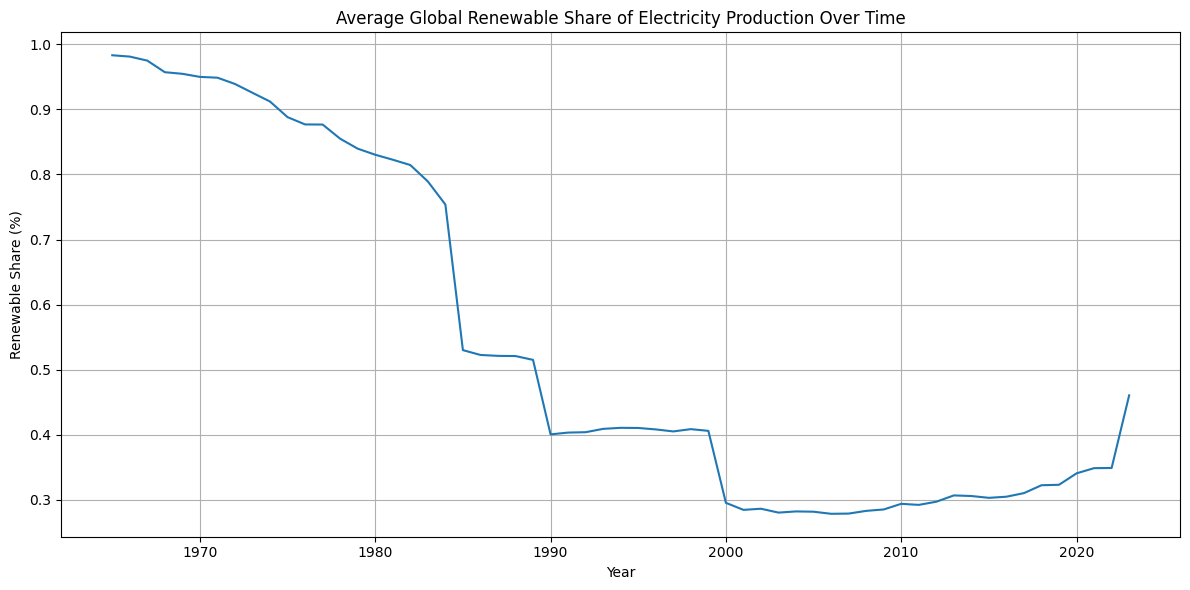

In [27]:
# Plotting trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_df, x='year', y='renewable_share')
plt.title('Average Global Renewable Share of Electricity Production Over Time')
plt.ylabel('Renewable Share (%)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


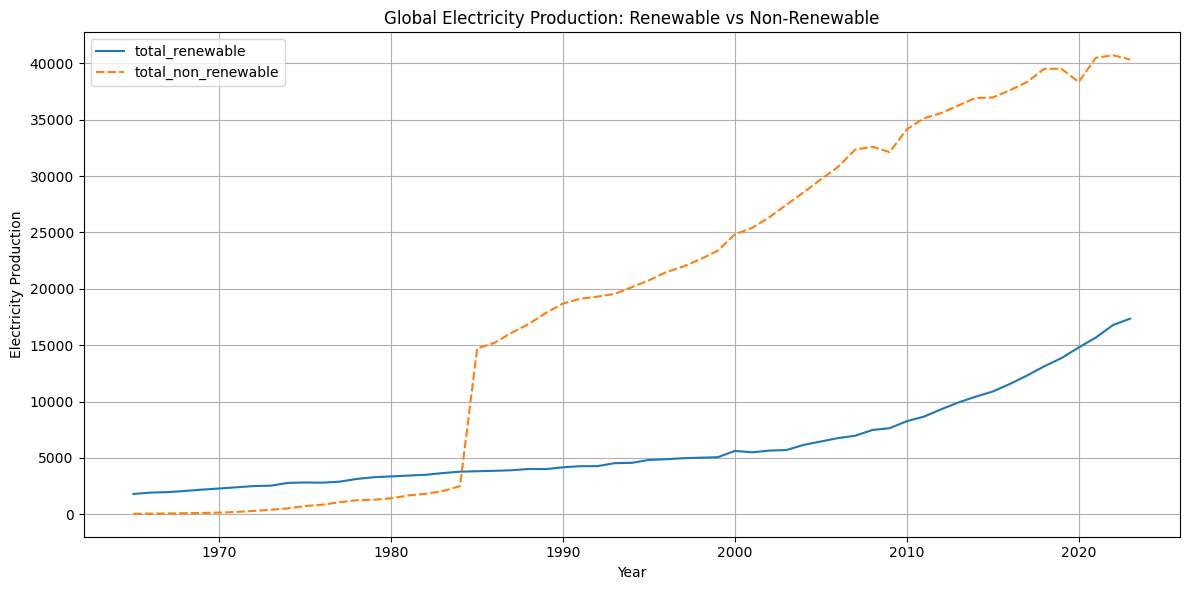

In [33]:
# Select only relevant columns for analysis
df.columns=df.columns.str.lower()
df_energy = df[['entity', 'year'] + energy_sources].dropna(subset=['entity', 'year'])

# Convert year to integer
df_energy['year'] = df_energy['year'].astype(int)

# Group by year and compute total production per source
df_yearly = df_energy.groupby('year')[energy_sources].sum()

df_yearly['total_renewable'] = df_yearly[renewables].sum(axis=1)
df_yearly['total_non_renewable'] = df_yearly[non_renewables].sum(axis=1)

# Plot trends of renewable vs non-renewable over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly[['total_renewable', 'total_non_renewable']])
plt.title("Global Electricity Production: Renewable vs Non-Renewable")
plt.ylabel("Electricity Production")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


**Key Observations**:

1)Renewable energy production (hydro, solar, wind, bioenergy, and other renewables) has seen a consistent increase, especially since the 2000s.

2)Non-renewable sources (coal, gas, oil, nuclear) have plateaued or declined slightly in recent years, though they still dominate total production.

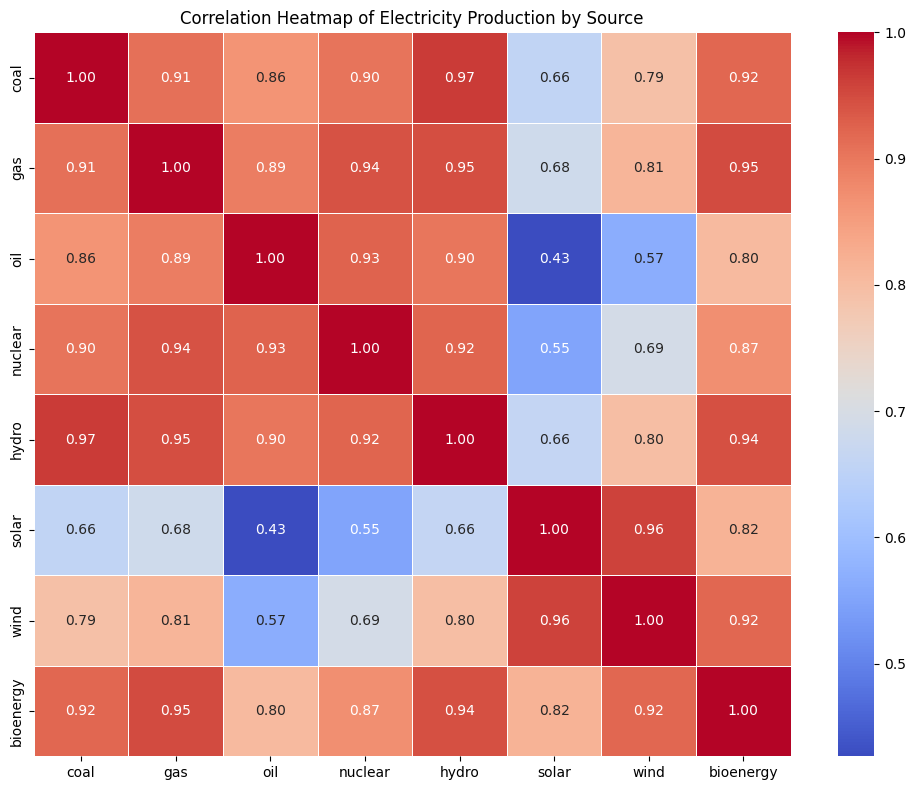

In [34]:
# Filter only numeric energy production columns for correlation analysis

df_energy = df[energy_sources].dropna()

# Compute the correlation matrix
correlation_matrix = df_energy.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Electricity Production by Source")
plt.tight_layout()
plt.show()


**Interpretation**:

1)High positive correlation: solar and wind show a strong positive correlation (0.96), suggesting countries that invest in one are likely investing in the other 
common in renewable focused strategies. Coal and gas also have a strong positive correlation, indicating traditional fossil fuel reliant countries often use both.

2)Low correlations:solar shows a low correlation with oil (0.43) and nuclear (0.55), implying independent strategic decisions on non renewables vs. solar energy.

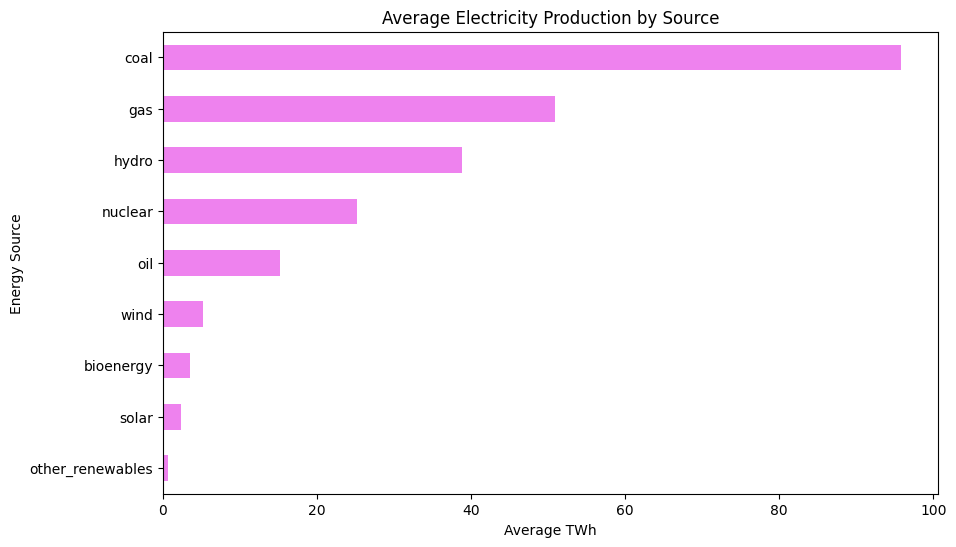

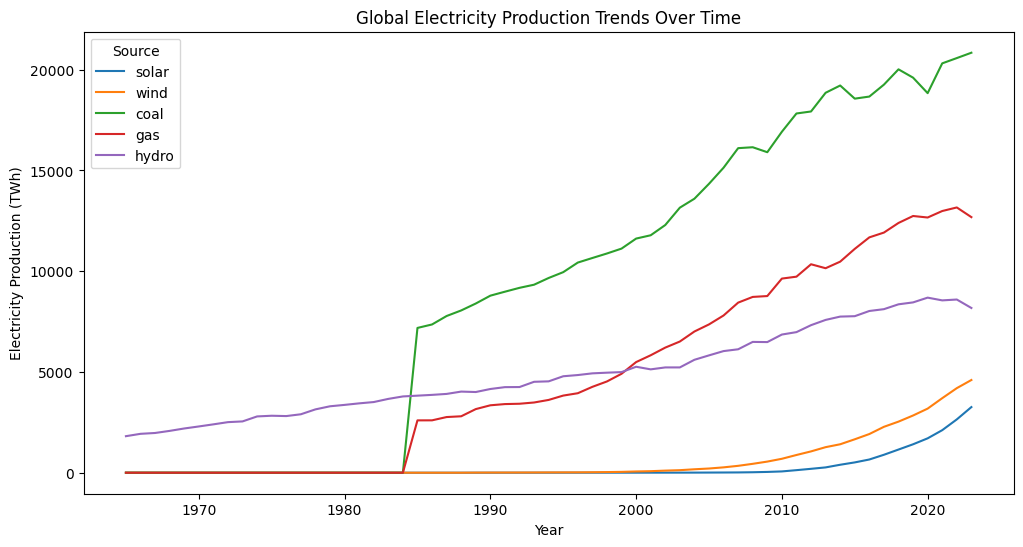

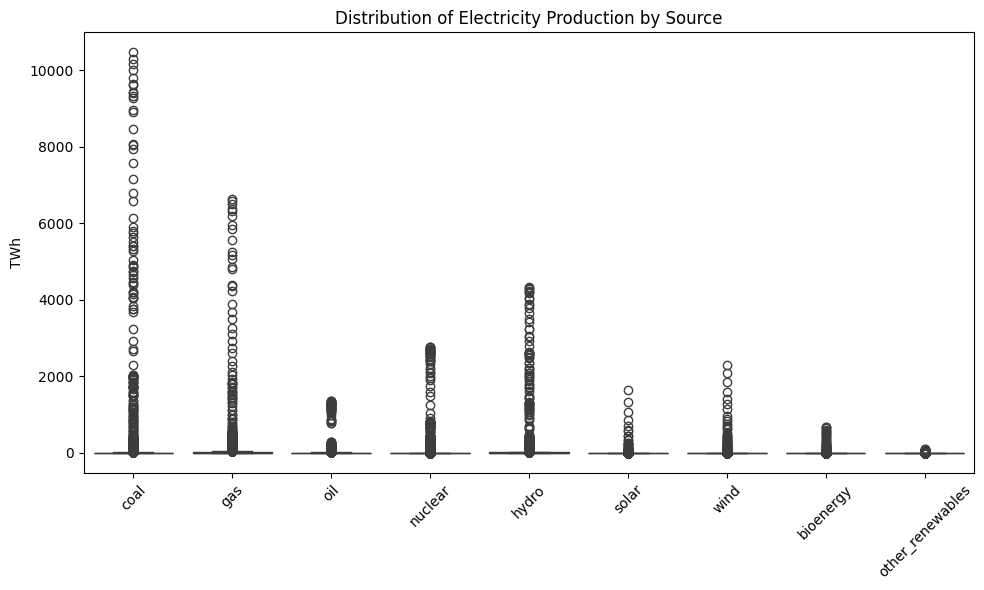

In [39]:

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Select numeric columns
numeric_cols = ['coal', 'gas', 'oil', 'nuclear', 'hydro', 'solar', 'wind', 'bioenergy', 'other_renewables']

# Distribution of production by source
fig1, ax1 = plt.subplots(figsize=(10, 6))
df[numeric_cols].mean().sort_values().plot(kind='barh', color='violet', ax=ax1)
ax1.set_title("Average Electricity Production by Source")
ax1.set_xlabel("Average TWh")
ax1.set_ylabel("Energy Source")

# Trend over time for selected sources
df_grouped = df.groupby("year")[numeric_cols].sum()
fig2, ax2 = plt.subplots(figsize=(12, 6))
df_grouped[['solar', 'wind', 'coal', 'gas', 'hydro']].plot(ax=ax2)
ax2.set_title("Global Electricity Production Trends Over Time")
ax2.set_xlabel("Year")
ax2.set_ylabel("Electricity Production (TWh)")
ax2.legend(title="Source")

# Boxplot to visualize distribution
fig3, ax3 = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols], ax=ax3)
ax3.set_title("Distribution of Electricity Production by Source")
ax3.set_ylabel("TWh")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


**Observations**

 1) Average Electricity Production by Source:

  - Coal, hydro, and gas are among the most significant contributors on average.

  - Solar, bioenergy, and wind are still catching up but show considerable growth potential.

     
 2) Global Production Trends Over Time:
    
  - Coal and gas maintain high but slowly declining production.

  - Solar and wind exhibit strong upward trends, reflecting the global shift toward renewables.

  - Hydro remains relatively stable.

 3) Distribution by Source:
    
 - High variability in coal and hydro production.

 - Renewables like solar and wind show increasing but more consistent patterns.



# **Recommendations**

1) Focus on coal, gas, and hydro:

  - Invest more in coal, gas, and hydro as they have the highest average electricity production usage (more than 40 TWh). 
   Prioritize maintenance, modernization, and efficiency upgrades to maximize output and reduce waste in these high-performing areas.

2) Address Missing Revenue Data:

  - The analysis identified so many missing data in almost all the columns. With 3510 missing values in the other renewable energy  column. 
   These missing values should be addressed promptly to ensure accurate analysis and reporting. 
   Implementing robust data collection and validation processes can prevent such issues in the future, ensuring complete and reliable data for decision-making.

3) Capitalize on Renewable Growth Momentum:
                                                                                                                                          
  - Increase investment in renewable infrastructure, storage solutions, and smart grids to capture long-term benefits and align with global sustainability goals.  
                                                                                                                                          
4) Manage Transition from Non-Renewables Proactively:
                                                                                                                                          
  - Gradually shift funding from non-renewables toward renewables while ensuring energy security.
   Modernize existing non-renewable plants to improve efficiency and reduce emissions during the transition.                                                                                                                                      